In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium

In [2]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,yr_built_bands
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,47.5112,-122.257,1340,5650,2014,10,13,13-2014,200K to 300K,1950s
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,9,9-2014,500K to 600K,1950s
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,25,25-2015,100K to 200K,1930s
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,9,9-2014,600K to 700K,1960s
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,18,18-2015,500K to 600K,1980s


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month', 'day', 'month_year', 'price_bands', 'yr_built_bands'],
      dtype='object')

Make a list of locations.

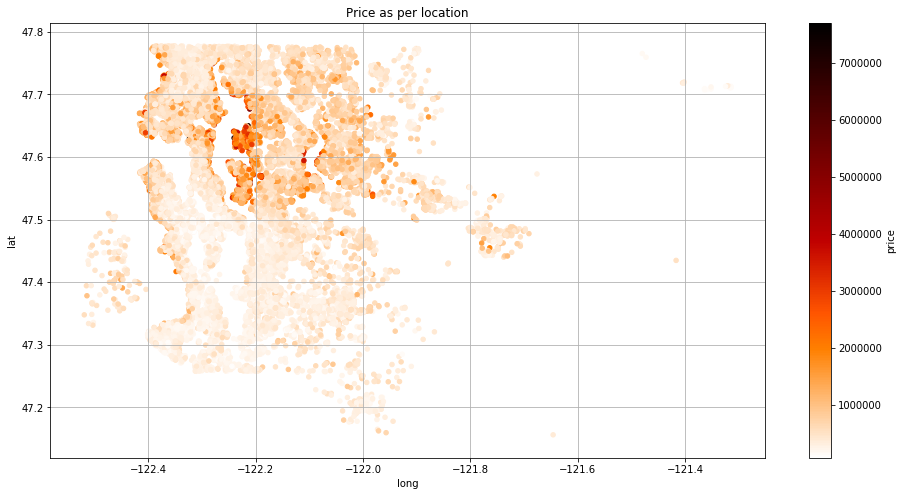

In [5]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Price as per location')
plt.show()

In [9]:
now = 2016

In [10]:
df['age'] = now - df['yr_built']

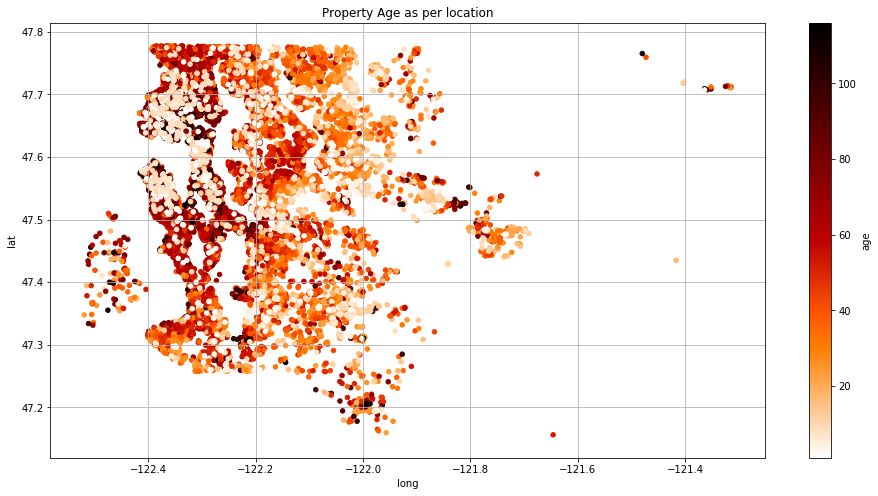

In [12]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="age",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

In [4]:
locations = list(df['location'])
locations[:5]

KeyError: 'location'

In [ ]:
list_long = np.array(df['long'])
list_long[:5]

In [ ]:
list_lat = np.array(df['lat'])
list_lat[:5]

In [ ]:
list_grade = np.array(df['grade'])
list_grade[:5]

## Basic Map

Just using the the first location as a starting point

In [ ]:
map_basic = folium.Map(location=[47.5112, -122.257], zoom_start=13)

In [ ]:
map_basic

## Check if markers work:

In [ ]:
marker_test = folium.CircleMarker(location = [47.5112, -122.257], radius = 1)
marker_test.add_to(map_basic)

In [ ]:
map_basic

In [ ]:
marker_test = folium.CircleMarker(location = [47.7210, -122.319], radius = 1)
marker_test.add_to(map_basic)

map_basic

Make the lat & long into markers.

In [ ]:
def to_marker(lat, long):
    return folium.CircleMarker(location=[lat, long], radius = 1)

In [ ]:
markers = map(to_marker,[list_lat, list_long])

Add the markers to the map

In [ ]:
def markers_to_map(markers, map_obj):
    for marker in markers:
        marker.add_to(map_obj)
    return map_obj

In [ ]:
map_housing = map(markers_to_map, [markers, map_basic])

In [ ]:
map_housing